Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import numpy as np # импортируем необходимы для проекта библиотеки
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1. Загрузка данных

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.isnull().mean().sort_values(ascending=False) # проверка на наличие пропущенных значений в столбцах

Страховые выплаты    0.0
Члены семьи          0.0
Зарплата             0.0
Возраст              0.0
Пол                  0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f154cfa9610>,
      dtype=object)

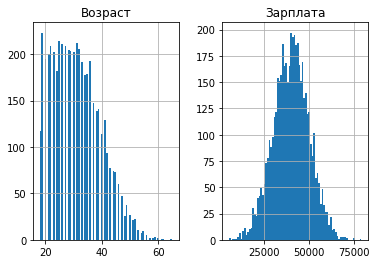

In [6]:
data[['Зарплата', 'Возраст']].hist(bins=80)

In [7]:
features = data.drop('Страховые выплаты', axis=1) # признаки 

In [8]:
target = data['Страховые выплаты'] # целевой признак 

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $a'$ - предсказания с умноженными признаками на обратимую матрицу

- $w'$ - вектор весов линейной регрессии с умноженными признаками на обратимую матрицу

- $E$ - еденичная матрица 

- $MSE$ - средняя квадратическая ошибка (mean squared error)

- $MSE'$ - средняя квадратическая ошибка с умноженными признаками на обратимую матрицу

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 

$$w' = P^{-1}w$$

$$a' = a$$

$$MSE' = MSE$$

Качество линейной регрессии не изменится.

**Обоснование:** 

$P$ — квадратная необратимая матрица размерностью равной ширине матрицы $X$

$$w' = ((XP)^{T}XP)^{-1}(XP)^{T}y$$

$$w' = (P^{T}(X^{T}X)P)^{-1}P^{T}X^{T}y$$

$$w' = P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y$$

$$w' = P^{-1}(X^{T}X)^{-1}EX^{T}y$$

$$w' = P^{-1}w$$

$$a' = (XP)(P)^{-1}w$$

$$a' = XEw$$

$$a' = Xw$$

$$a' = a$$

$$MSE = n^{-1}\displaystyle\sum_{i=1}^{n} (y - a)^{2}$$

$$MSE' = n^{-1}\displaystyle\sum_{i=1}^{n} (y - a')^{2}$$

$$a' = a \rightarrow MSE = MSE'$$

## 3. Алгоритм преобразования

**Алгоритм**
 - Функция конфигурации матриц кодирования и декодирования:
    - реализация случаной генерации матрицы кодирования
        - матрица должна быть обратимой (определитель не должен равняться нулю)
        - матрица должна быть квадратной
        - размерность матрицы равна количеству признаков
    - матрица декодирования есть обратная от матрицы кодирования
    - на выходе две матрицы: кодирования и декодирования

**Обоснование**


При кодировании квадратной обратимой матрицей размерностью равной количесву признаков и обучению на линейной регрессии согласно выкладкам в п. 2 мы получаем идентичные значения предсказаний закодированных и не закодированных признаков. Следовательно и одинаковые средние квадратические ошибки. А матрица декодирования согласно зависемоти закодированного и незакодированно векторов весов есть обратная к матрице кодирования.

## 4. Проверка алгоритма

In [9]:
# функция создающая две матрицы размерностями n и заполненная случайными значениями из нормального распределения
# матрицы квадратные и обратимые, вторая матрица обратная первой
def codec(n):  
    det = 0
    while det == 0:
        matrix = np.random.normal(size = (n, n))
        det = np.linalg.det(matrix) 
    matrix_inv = np.linalg.inv(matrix)
    return matrix, matrix_inv

In [10]:
key, key_inv = codec(features.shape[1]) # матрицы кодирования и декодирования

In [11]:
features_x = features.dot(key) # кодирование признаков

In [12]:
features_x.head()

,0,1,2,3
0,13382.965814,90692.999067,5736.940752,34465.159209
1,10263.698249,69492.259314,4382.578915,26405.536936
2,5673.877003,38406.142878,2418.951081,14593.014594
3,11243.706817,76238.381637,4834.655839,28977.043813
4,7045.925701,47728.108883,3013.360834,18135.077636


In [13]:
# обучение, предсказание и оценка качества линейной регрессии на не зашифрованных признаках
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2_open_data:', r2_score(target, predictions))

R2_open_data: 0.42494550286668


In [20]:
# обучение, предсказание и оценка качества линейной регрессии на зашифрованных признаках
model_x = LinearRegression()
model_x.fit(features_x, target)
predictions_x = model.predict(features_x)
print('R2_open_data:', r2_score(target, predictions_x))

R2_open_data: 0.4249455028666751


Как мы видим метрики качества R2 моделей обучения линейной регрессии практически идентичны как на закодированных так и на не закодированных признаках.

In [15]:
features_open = features_x.dot(key_inv) # декодирование признаков

In [16]:
features_open = np.around(features_open) # округление значений

In [17]:
features_open.columns = features.columns.tolist() # обновление названий столбцов

In [22]:
features_open = abs(features_open)

In [24]:
features_open.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


In [23]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


**Вывод:** использование для кодирования (декодирования) признаков обратимой квадратной матрицы размерностью равной количеству признаков с случайными значениями не ухудшает качество предсказаний модели обученной на линейной регрессии.